# Overview: 

This notebook is created to do tasks given in issue no #63: [Learning from misclassification](https://github.com/mozilla/PRESC/issues/63)


## Task

-Develop a metric or visualization that reveals something more about each misclassified point (beyond just the fact that it was misclassified) that can be used to improve the model.


*While working on issue #2 I have showed visualization for decision tree and showed visualization and explained for its misclassification and #7 I have showed misclassification for datapoints  using support vector machine by varying its parameter C which is called the penalty parameter and for decision tree showed misclassification.*


----



In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split

# Import packages to do the classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.utils.multiclass import unique_labels

In [2]:
df = pd.read_csv("../../datasets/defaults.csv")

In [3]:
df = df.rename(columns={'defaulted': 'def_pay','pay_0': 'pay_1'})

In [4]:
target = df['def_pay'].copy()

In [5]:
# creating the features, which now will be everything in the original df
features = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
#X = df[features].copy()
#features.columns
features = df[features].copy()
features.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')

# Decision tree

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [7]:
#createing the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# doing predictions on the test
predictions = classifier.predict(X_test)

# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.812

**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class


In [23]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    4687
1    1313
Name: def_pay, dtype: int64

In [24]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.21883333333333332

In [25]:
# calculate the percentage of zeros
1 - y_test.mean()

0.7811666666666667

This means that a dumb model that always predicts 0 would be right 78% of the time

- This shows how classification accuracy is not that good as it's close to a dumb model
- It's a good way to know the minimum we should achieve with our models

In [26]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.781167
Name: def_pay, dtype: float64

Comparing the *true* and *predicted* response values

In [27]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', predictions[0:25])

True: [0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
False: [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]


This digits of accuracy do not give the correct result. Thats why we plot confusion matrix for seeing misclassification. Here I am adding misclassification to check the misclassified values.


## Confusion matrix: 


Confusion matrix, a table that describes the performance of a classification model. Confusion Matrix tells us how many our model predicted correctly and incorrectly in terms of binary/multiple outcome classes by comparing actual and predicted cases. We have fit the model using X_train and y_train and predicted the outcome of X_test in the variable y_pred. So, now we will use a confusion matrix to compare between y_test and y_pred. Let's do the confusion matrix.




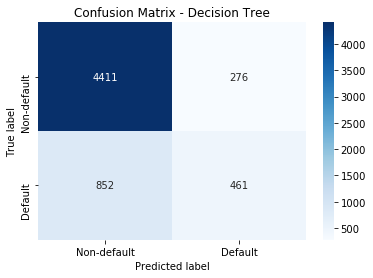

In [8]:
ConfMatrix = confusion_matrix(y_test,classifier.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

In [38]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[4411  276]
 [ 852  461]]


A confusion matrix is showing the frequency of misclassification of our classifier.


Our y_test has a total of 6000 data points; which we got by spliting our dataset in order to evaluate our model. Each number here represents certain details about our model. If we were to think about this in terms of column and raw, we could see that...

- the first column is of data points that the machine predicted as non-default.
- the second column is of the statistics that the model predicted as default.
- In terms of raws, the first raw indexed as non-default means that the value in that raw are actual statistics of default value.

Now we can see that the predicted non-default and predicted default sort of overlap with actual default and actual non-default. After all it is a matrix and we have some terminologies to call these statistics more specifically. Let's see what they are and determine the value of all these terminologies. 

- **True Positive(TP):** values that the model predicted as yes(default) and is actually yes(default).
    - Here its value is 461
- **True Negative(TN):** values that model predicted as no(non-default) and is actually no(non-default)
    - Here its value is 4411
- **False Positive(or Type I error):** values that model predicted as yes(default) but actually no(non-default)
    - Here its value is 276
- **False Negative(or Type II error):** values that model predicted as no(non-default) but actually yes(default)
    - Here its value is 852


From these four terminologies, we can compute many other rates that are used to evaluate a binary classifier.
Accuracy:
Accuracy is the measure of how often the model is correct.

`(TP + TN)/total = (461+4411)/6000 = .812`

I got the same value from scikit learn.

## Misclassification Rate: 

**Misclassification Rate is the measure of how often the model is wrong**

- Misclassification Rate and Accuracy are opposite of each other.
- Misclassification is equivalent to 1 minus Accuracy.
- Misclassification Rate is also known as "Error Rate".

`(FP + FN)/Total = (276+852)/6000 = 0.188`



In [45]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, predictions))

0.188
0.18799999999999994


**True Positive Rate/Recall/Sensitivity:** 

Sensitivity: When the actual value is positive, how often is the prediction correct?

- Something we want to maximize
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

`TP/(TP+FN) = 461/(461+852) = 0.351104`

In [46]:
#recall_score(y_test, predictions)
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, predictions))

0.3511043412033511
0.3511043412033511


**True Negative Rate/Specificity:** 

Specificity: When the actual value is negative, how often is the prediction correct?

- Something we want to maximize
- How "specific" (or "selective") is the classifier in predicting positive instances?
- True Negative Rate is equivalent to 1 minus False Positive Rate.

`TN/(TN+FP) = 4411/(4411+276) = 0.941113719`

In [43]:
specificity = TN / (TN + FP)

print(specificity)

0.9411137187966716


Here we can see our classifier is 
- Highly specific
- Not sensitive

**False Positive Rate:** 

When the actual value is negative, how often is the prediction incorrect?

`FP/(FP+TN) = 276/(276+4411) = 0.0588862812`

In [44]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.05888628120332835
0.058886281203328394


**Precision:** 

Precision: When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

`TP/(TP+FP) = 461/(461+276) = 0.0.62550882`

In [49]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, predictions))

0.6255088195386703
0.6255088195386703


In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.35      0.45      1313

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



we have our confusion matrix. Now we will give it a little more character.

Confusion matrix, without normalization
[[4411  276]
 [ 852  461]]
Normalized confusion matrix
[[0.94 0.06]
 [0.65 0.35]]


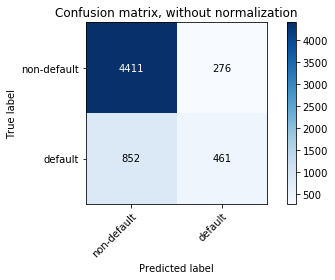

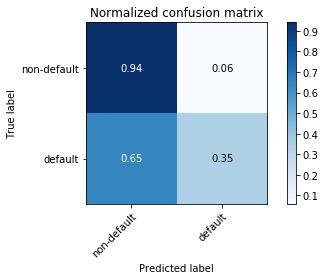

In [12]:
def plot_confusion_matrix(y_true, predictions, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, predictions)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, predictions)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['non-default','default'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predictions, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()